# 分类

In [8]:
import pandas as pd
column_names =['CONFID','UID_','GID','ISREGISTER','USERTYPE','USEROS','OSVERSION','USERBROWSER','BROWSERVERSION','JOINMETHOD','SERVICETYPE','SERVICEID','SITEID','SITEVERSION','COUNTRY','PLATFORM','SYSTEM','ISHOST','STARTJOINTIME','JOINEDTIME','USERJMT','LABEL']

df = pd.read_csv('/Users/cisco/data/top-jmt/2018-04-15.csv',sep="\t",names=column_names)
del df['STARTJOINTIME'] 
del df['JOINEDTIME'] 

df[['CONFID', 'UID_', 'GID','SERVICEID','SITEID','PLATFORM','LABEL']] = df[['CONFID', 'UID_', 'GID','SERVICEID','SITEID','PLATFORM','LABEL']].astype(str)
df.insert(0,'USERID',df['CONFID']+'|'+df['UID_']+"|"+df['GID'])
del df['CONFID'] 
del df['UID_']
del df['GID'] 

print(df.columns)
print(df.describe(include='all'))
df.head()

Index(['USERID', 'ISREGISTER', 'USERTYPE', 'USEROS', 'OSVERSION',
       'USERBROWSER', 'BROWSERVERSION', 'JOINMETHOD', 'SERVICETYPE',
       'SERVICEID', 'SITEID', 'SITEVERSION', 'COUNTRY', 'PLATFORM', 'SYSTEM',
       'ISHOST', 'USERJMT', 'LABEL'],
      dtype='object')
                               USERID ISREGISTER USERTYPE USEROS OSVERSION  \
count                           32000      32000    32000  32000     32000   
unique                          32000          2        3      9        30   
top     92319959515963546|529150727|0       True   RETURN     TP     Other   
freq                                1      18494    20459  15945     17186   
mean                              NaN        NaN      NaN    NaN       NaN   
std                               NaN        NaN      NaN    NaN       NaN   
min                               NaN        NaN      NaN    NaN       NaN   
25%                               NaN        NaN      NaN    NaN       NaN   
50%                      

,USERID,ISREGISTER,USERTYPE,USEROS,OSVERSION,USERBROWSER,BROWSERVERSION,JOINMETHOD,SERVICETYPE,SERVICEID,SITEID,SITEVERSION,COUNTRY,PLATFORM,SYSTEM,ISHOST,USERJMT,LABEL
0,92344832992770567|539371332|0,True,RETURN,TP,Other,Other,Other,CWSAPI,MC,1,1061642,T32L,UNITED STATES,10,Webex,True,0.0,0
1,92345470002690640|539371332|0,True,RETURN,TP,Other,Other,Other,CWSAPI,MC,1,1061642,T32L,UNITED STATES,10,Webex,True,0.0,0
2,92351122711280289|539371332|0,True,RETURN,TP,Other,Other,Other,CWSAPI,MC,1,1061642,T32L,UNITED STATES,10,Webex,True,0.0,0
3,92370622753044580|539371332|0,True,RETURN,TP,Other,Other,Other,CWSAPI,MC,1,1061642,T32L,UNITED STATES,10,Webex,True,0.0,0
4,92338789802867015|0|721994301,False,RETURN,TP,Other,Other,Other,CWSAPI,MC,1,1065492,T32L,UNITED STATES,10,Webex,False,0.0,0


In [9]:
# 类别特征进行二值化编码
dummies_ISREGISTER = pd.get_dummies(df['ISREGISTER'], prefix= 'ISREGISTER')
dummies_USERTYPE = pd.get_dummies(df['USERTYPE'], prefix= 'USERTYPE')
dummies_USEROS = pd.get_dummies(df['USEROS'], prefix= 'USEROS')
dummies_OSVERSION = pd.get_dummies(df['OSVERSION'], prefix= 'OSVERSION')
dummies_USERBROWSER = pd.get_dummies(df['USERBROWSER'], prefix= 'USERBROWSER')
dummies_BROWSERVERSION = pd.get_dummies(df['BROWSERVERSION'], prefix= 'BROWSERVERSION')
dummies_JOINMETHOD = pd.get_dummies(df['JOINMETHOD'], prefix= 'JOINMETHOD')
dummies_SERVICETYPE = pd.get_dummies(df['SERVICETYPE'], prefix= 'SERVICETYPE')
dummies_SERVICEID = pd.get_dummies(df['SERVICEID'], prefix= 'SERVICEID')
# dummies_SITEID = pd.get_dummies(df['SITEID'], prefix= 'SITEID')
dummies_SITEVERSION = pd.get_dummies(df['SITEVERSION'], prefix= 'SITEVERSION')
# dummies_COUNTRY = pd.get_dummies(df['COUNTRY'], prefix= 'COUNTRY')
dummies_PLATFORM = pd.get_dummies(df['PLATFORM'], prefix= 'PLATFORM')
dummies_SYSTEM = pd.get_dummies(df['SYSTEM'], prefix= 'SYSTEM')
dummies_ISHOST = pd.get_dummies(df['ISHOST'], prefix= 'ISHOST')


# jmt_feature = pd.concat([dummies_ISREGISTER,dummies_USERTYPE,dummies_USEROS,dummies_OSVERSION,dummies_USERBROWSER,dummies_BROWSERVERSION,dummies_JOINMETHOD,dummies_SERVICETYPE,dummies_SERVICEID,dummies_SITEID,dummies_SITEVERSION,dummies_COUNTRY,dummies_PLATFORM,dummies_SYSTEM,dummies_ISHOST], axis=1)
jmt_feature = pd.concat([dummies_ISREGISTER,dummies_USERTYPE,dummies_USEROS,dummies_OSVERSION,dummies_USERBROWSER,dummies_BROWSERVERSION,dummies_JOINMETHOD,dummies_SERVICETYPE,dummies_SERVICEID,dummies_SITEVERSION,dummies_PLATFORM,dummies_SYSTEM,dummies_ISHOST], axis=1)

jmt_class_target = df.loc[:,['LABEL']]
jmt_regre_target = df.loc[:,['USERJMT']]

pd.set_option('display.max_rows',None)
pd.set_option('display.max_columns',None)

In [10]:
df.head()

,USERID,ISREGISTER,USERTYPE,USEROS,OSVERSION,USERBROWSER,BROWSERVERSION,JOINMETHOD,SERVICETYPE,SERVICEID,SITEID,SITEVERSION,COUNTRY,PLATFORM,SYSTEM,ISHOST,USERJMT,LABEL
0,92344832992770567|539371332|0,True,RETURN,TP,Other,Other,Other,CWSAPI,MC,1,1061642,T32L,UNITED STATES,10,Webex,True,0.0,0
1,92345470002690640|539371332|0,True,RETURN,TP,Other,Other,Other,CWSAPI,MC,1,1061642,T32L,UNITED STATES,10,Webex,True,0.0,0
2,92351122711280289|539371332|0,True,RETURN,TP,Other,Other,Other,CWSAPI,MC,1,1061642,T32L,UNITED STATES,10,Webex,True,0.0,0
3,92370622753044580|539371332|0,True,RETURN,TP,Other,Other,Other,CWSAPI,MC,1,1061642,T32L,UNITED STATES,10,Webex,True,0.0,0
4,92338789802867015|0|721994301,False,RETURN,TP,Other,Other,Other,CWSAPI,MC,1,1065492,T32L,UNITED STATES,10,Webex,False,0.0,0


In [11]:
jmt_feature.head()

,ISREGISTER_False,ISREGISTER_True,USERTYPE_NEW,USERTYPE_RETURN,USERTYPE_UPDATE,USEROS_Android,USEROS_Cros,USEROS_IOS,USEROS_Linux,USEROS_Mac,USEROS_Other,USEROS_TP,USEROS_Windows,USEROS_WindowsPhone,OSVERSION_10.0,OSVERSION_10.1,OSVERSION_10.10,OSVERSION_10.11,OSVERSION_10.12,OSVERSION_10.13,OSVERSION_10.2,OSVERSION_10.3,OSVERSION_10.4,OSVERSION_10.5,OSVERSION_10.6,OSVERSION_10.7,OSVERSION_10.8,OSVERSION_10.9,OSVERSION_4.0,OSVERSION_7.0,OSVERSION_8.0,OSVERSION_8.1,OSVERSION_9.1,OSVERSION_9.10,OSVERSION_9.11,OSVERSION_9.13,OSVERSION_9.14,OSVERSION_9.15,OSVERSION_9.6,OSVERSION_9.8,OSVERSION_9.9,OSVERSION_Other,OSVERSION_Vista,OSVERSION_XP,USERBROWSER_Chrome,USERBROWSER_Edge,USERBROWSER_Firefox,USERBROWSER_IE,USERBROWSER_Jabber,USERBROWSER_Other,USERBROWSER_PT,USERBROWSER_Safari,BROWSERVERSION_10.0,BROWSERVERSION_10.1,BROWSERVERSION_11.0,BROWSERVERSION_11.1,BROWSERVERSION_12.0,BROWSERVERSION_13.0,BROWSERVERSION_19.0,BROWSERVERSION_2.0,BROWSERVERSION_23.0,BROWSERVERSION_24.0,BROWSERVERSION_27.0,BROWSERVERSION_29.0,BROWSERVERSION_30.0,BROWSERVERSION_31.0,BROWSERVERSION_33.0,BROWSERVERSION_34.0,BROWSERVERSION_36.0,BROWSERVERSION_36.04,BROWSERVERSION_38.0,BROWSERVERSION_39.0,BROWSERVERSION_40.0,BROWSERVERSION_41.0,BROWSERVERSION_42.0,BROWSERVERSION_43.0,BROWSERVERSION_44.0,BROWSERVERSION_45.0,BROWSERVERSION_46.0,BROWSERVERSION_47.0,BROWSERVERSION_48.0,BROWSERVERSION_49.0,BROWSERVERSION_50.0,BROWSERVERSION_51.0,BROWSERVERSION_52.0,BROWSERVERSION_53.0,BROWSERVERSION_54.0,BROWSERVERSION_55.0,BROWSERVERSION_56.0,BROWSERVERSION_57.0,BROWSERVERSION_57.14,BROWSERVERSION_58.0,BROWSERVERSION_59.0,BROWSERVERSION_6.0,BROWSERVERSION_6.2,BROWSERVERSION_60.0,BROWSERVERSION_61.0,BROWSERVERSION_62.0,BROWSERVERSION_63.0,BROWSERVERSION_64.0,BROWSERVERSION_65.0,BROWSERVERSION_66.0,BROWSERVERSION_67.0,BROWSERVERSION_68.0,BROWSERVERSION_7.0,BROWSERVERSION_8.0,BROWSERVERSION_9.0,BROWSERVERSION_9.1,BROWSERVERSION_Other,JOINMETHOD_ActiveX,JOINMETHOD_CWSAPI,JOINMETHOD_Extension,JOINMETHOD_JNLP,JOINMETHOD_JavaDownload,JOINMETHOD_Other,JOINMETHOD_Plugin,JOINMETHOD_TFS,JOINMETHOD_ThinClient,JOINMETHOD_URLProtocol,SERVICETYPE_EC,SERVICETYPE_MC,SERVICETYPE_SC,SERVICETYPE_TC,SERVICETYPE_UNKNOWN,SERVICEID_0,SERVICEID_1,SERVICEID_15,SERVICEID_4,SERVICEID_6,SERVICEID_7,SERVICEID_9,SITEVERSION_T31L,SITEVERSION_T32L,PLATFORM_0,PLATFORM_1,PLATFORM_10,PLATFORM_12,PLATFORM_13,PLATFORM_15,PLATFORM_4,PLATFORM_7,SYSTEM_Spark,SYSTEM_Webex,ISHOST_False,ISHOST_True
0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,1
1,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,1
2,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,1
3,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,1
4,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,1,0


In [12]:
# 把数据集随机拆为训练集和测试集

from sklearn.cross_validation import train_test_split
cls_feature_train, cls_feature_test, category_train, category_test = train_test_split(jmt_feature, jmt_class_target, test_size=0.25, random_state=1)

/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


## 逻辑回归

In [28]:
from sklearn import linear_model
import time

start = time.time()
# fit到RandomForestRegressor之中
lr = linear_model.LogisticRegression(C=1.0, penalty='l1', tol=1e-6)
lr.fit(cls_feature_train, category_train)

/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l1', random_state=None, solver='liblinear', tol=1e-06,
          verbose=0, warm_start=False)

### 预测以及评估

In [35]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [36]:
from sklearn.metrics import accuracy_score
lr_predict_test = lr.predict(cls_feature_test)
print(accuracy_score(category_test, lr_predict_test))

0.997


In [30]:
confusion = confusion_matrix(category_test, lr_predict_test)
print(confusion)
print()
print('每个分类的准确率、召回率、f1-score')
print(classification_report(category_test, lr_predict_test, target_names=['0', '1'])) 

[[4043   24]
 [   0 3933]]

每个分类的准确率、召回率、f1-score
             precision    recall  f1-score   support

          0       1.00      0.99      1.00      4067
          1       0.99      1.00      1.00      3933

avg / total       1.00      1.00      1.00      8000



## CART 分类

In [13]:
# 转化为numpy数据格式，输入决策树训练. entropy 为信息增益
from sklearn.tree import DecisionTreeClassifier

cart=DecisionTreeClassifier(criterion='gini',max_depth=7)
cart.fit(cls_feature_train, category_train)
cls_feature_train.columns.values

array(['ISREGISTER_False', 'ISREGISTER_True', 'USERTYPE_NEW',
       'USERTYPE_RETURN', 'USERTYPE_UPDATE', 'USEROS_Android',
       'USEROS_Cros', 'USEROS_IOS', 'USEROS_Linux', 'USEROS_Mac',
       'USEROS_Other', 'USEROS_TP', 'USEROS_Windows',
       'USEROS_WindowsPhone', 'OSVERSION_10.0', 'OSVERSION_10.1',
       'OSVERSION_10.10', 'OSVERSION_10.11', 'OSVERSION_10.12',
       'OSVERSION_10.13', 'OSVERSION_10.2', 'OSVERSION_10.3',
       'OSVERSION_10.4', 'OSVERSION_10.5', 'OSVERSION_10.6',
       'OSVERSION_10.7', 'OSVERSION_10.8', 'OSVERSION_10.9',
       'OSVERSION_4.0', 'OSVERSION_7.0', 'OSVERSION_8.0', 'OSVERSION_8.1',
       'OSVERSION_9.1', 'OSVERSION_9.10', 'OSVERSION_9.11',
       'OSVERSION_9.13', 'OSVERSION_9.14', 'OSVERSION_9.15',
       'OSVERSION_9.6', 'OSVERSION_9.8', 'OSVERSION_9.9',
       'OSVERSION_Other', 'OSVERSION_Vista', 'OSVERSION_XP',
       'USERBROWSER_Chrome', 'USERBROWSER_Edge', 'USERBROWSER_Firefox',
       'USERBROWSER_IE', 'USERBROWSER_Jabber', 'USERBR

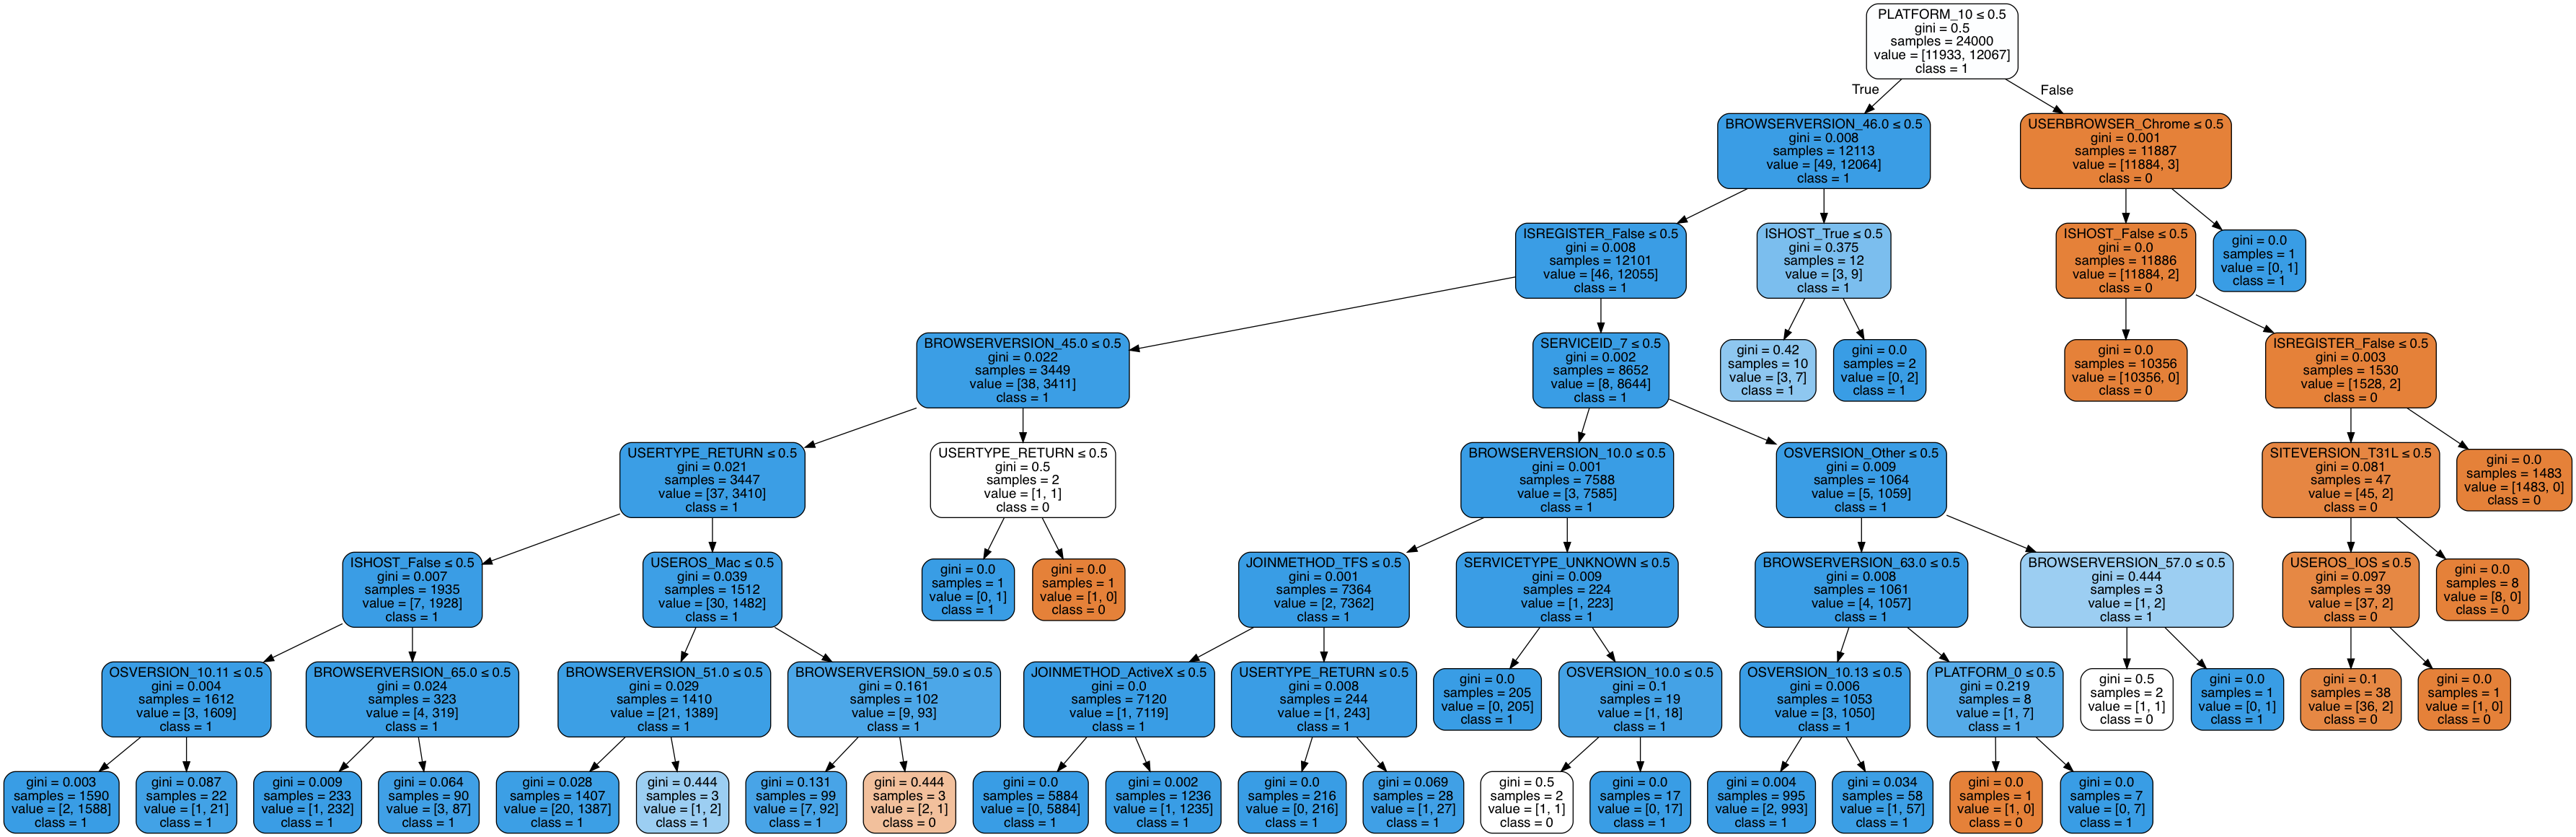

In [17]:
# 结果展示
from IPython.display import Image 
from sklearn import tree
from sklearn.externals.six import StringIO
import pydotplus


dot_data = StringIO() 
tree.export_graphviz(cart, out_file=dot_data, 
  feature_names = ['ISREGISTER_False', 'ISREGISTER_True', 'USERTYPE_NEW',
       'USERTYPE_RETURN', 'USERTYPE_UPDATE', 'USEROS_Android',
       'USEROS_Cros', 'USEROS_IOS', 'USEROS_Linux', 'USEROS_Mac',
       'USEROS_Other', 'USEROS_TP', 'USEROS_Windows',
       'USEROS_WindowsPhone', 'OSVERSION_10.0', 'OSVERSION_10.1',
       'OSVERSION_10.10', 'OSVERSION_10.11', 'OSVERSION_10.12',
       'OSVERSION_10.13', 'OSVERSION_10.2', 'OSVERSION_10.3',
       'OSVERSION_10.4', 'OSVERSION_10.5', 'OSVERSION_10.6',
       'OSVERSION_10.7', 'OSVERSION_10.8', 'OSVERSION_10.9',
       'OSVERSION_4.0', 'OSVERSION_7.0', 'OSVERSION_8.0', 'OSVERSION_8.1',
       'OSVERSION_9.1', 'OSVERSION_9.10', 'OSVERSION_9.11',
       'OSVERSION_9.13', 'OSVERSION_9.14', 'OSVERSION_9.15',
       'OSVERSION_9.6', 'OSVERSION_9.8', 'OSVERSION_9.9',
       'OSVERSION_Other', 'OSVERSION_Vista', 'OSVERSION_XP',
       'USERBROWSER_Chrome', 'USERBROWSER_Edge', 'USERBROWSER_Firefox',
       'USERBROWSER_IE', 'USERBROWSER_Jabber', 'USERBROWSER_Other',
       'USERBROWSER_PT', 'USERBROWSER_Safari', 'BROWSERVERSION_10.0',
       'BROWSERVERSION_10.1', 'BROWSERVERSION_11.0', 'BROWSERVERSION_11.1',
       'BROWSERVERSION_12.0', 'BROWSERVERSION_13.0', 'BROWSERVERSION_19.0',
       'BROWSERVERSION_2.0', 'BROWSERVERSION_23.0', 'BROWSERVERSION_24.0',
       'BROWSERVERSION_27.0', 'BROWSERVERSION_29.0', 'BROWSERVERSION_30.0',
       'BROWSERVERSION_31.0', 'BROWSERVERSION_33.0', 'BROWSERVERSION_34.0',
       'BROWSERVERSION_36.0', 'BROWSERVERSION_36.04',
       'BROWSERVERSION_38.0', 'BROWSERVERSION_39.0', 'BROWSERVERSION_40.0',
       'BROWSERVERSION_41.0', 'BROWSERVERSION_42.0', 'BROWSERVERSION_43.0',
       'BROWSERVERSION_44.0', 'BROWSERVERSION_45.0', 'BROWSERVERSION_46.0',
       'BROWSERVERSION_47.0', 'BROWSERVERSION_48.0', 'BROWSERVERSION_49.0',
       'BROWSERVERSION_50.0', 'BROWSERVERSION_51.0', 'BROWSERVERSION_52.0',
       'BROWSERVERSION_53.0', 'BROWSERVERSION_54.0', 'BROWSERVERSION_55.0',
       'BROWSERVERSION_56.0', 'BROWSERVERSION_57.0',
       'BROWSERVERSION_57.14', 'BROWSERVERSION_58.0',
       'BROWSERVERSION_59.0', 'BROWSERVERSION_6.0', 'BROWSERVERSION_6.2',
       'BROWSERVERSION_60.0', 'BROWSERVERSION_61.0', 'BROWSERVERSION_62.0',
       'BROWSERVERSION_63.0', 'BROWSERVERSION_64.0', 'BROWSERVERSION_65.0',
       'BROWSERVERSION_66.0', 'BROWSERVERSION_67.0', 'BROWSERVERSION_68.0',
       'BROWSERVERSION_7.0', 'BROWSERVERSION_8.0', 'BROWSERVERSION_9.0',
       'BROWSERVERSION_9.1', 'BROWSERVERSION_Other', 'JOINMETHOD_ActiveX',
       'JOINMETHOD_CWSAPI', 'JOINMETHOD_Extension', 'JOINMETHOD_JNLP',
       'JOINMETHOD_JavaDownload', 'JOINMETHOD_Other', 'JOINMETHOD_Plugin',
       'JOINMETHOD_TFS', 'JOINMETHOD_ThinClient', 'JOINMETHOD_URLProtocol',
       'SERVICETYPE_EC', 'SERVICETYPE_MC', 'SERVICETYPE_SC',
       'SERVICETYPE_TC', 'SERVICETYPE_UNKNOWN', 'SERVICEID_0',
       'SERVICEID_1', 'SERVICEID_15', 'SERVICEID_4', 'SERVICEID_6',
       'SERVICEID_7', 'SERVICEID_9', 'SITEVERSION_T31L',
       'SITEVERSION_T32L', 'PLATFORM_0', 'PLATFORM_1', 'PLATFORM_10',
       'PLATFORM_12', 'PLATFORM_13', 'PLATFORM_15', 'PLATFORM_4',
       'PLATFORM_7', 'SYSTEM_Spark', 'SYSTEM_Webex', 'ISHOST_False',
       'ISHOST_True'],
                    class_names=['0','1','2'],  
                    filled=True, rounded=True,  
                    special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())


### 预测以及评估

In [32]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [33]:
# 决策树分类准确率计算
cart_predict_test = cart.predict(cls_feature_test)
print(accuracy_score(category_test, cart_predict_test))

0.9965


In [34]:
confusion = confusion_matrix(category_test, cart_predict_test)
print(confusion)
print('每个分类的准确率、召回率、f1-score')
print(classification_report(category_test, cart_predict_test, target_names=['0', '1'])) 

[[4043   24]
 [   4 3929]]
每个分类的准确率、召回率、f1-score
             precision    recall  f1-score   support

          0       1.00      0.99      1.00      4067
          1       0.99      1.00      1.00      3933

avg / total       1.00      1.00      1.00      8000



# 回归

In [37]:
import pandas as pd
column_names =['CONFID','UID_','GID','ISREGISTER','USERTYPE','USEROS','OSVERSION','USERBROWSER','BROWSERVERSION','JOINMETHOD','SERVICETYPE','SERVICEID','SITEID','SITEVERSION','COUNTRY','PLATFORM','SYSTEM','ISHOST','STARTJOINTIME','JOINEDTIME','USERJMT','LABEL']

df = pd.read_csv('/Users/cisco/data/top-jmt/2018-04-15.csv',sep="\t",names=column_names)
del df['STARTJOINTIME'] 
del df['JOINEDTIME'] 

df[['CONFID', 'UID_', 'GID']] = df[['CONFID', 'UID_', 'GID']].astype(str)
df.insert(0,'USERID',df['CONFID']+'|'+df['UID_']+"|"+df['GID'])
del df['CONFID'] 
del df['UID_']
del df['GID'] 

print(df.columns)
df.head()

Index(['USERID', 'ISREGISTER', 'USERTYPE', 'USEROS', 'OSVERSION',
       'USERBROWSER', 'BROWSERVERSION', 'JOINMETHOD', 'SERVICETYPE',
       'SERVICEID', 'SITEID', 'SITEVERSION', 'COUNTRY', 'PLATFORM', 'SYSTEM',
       'ISHOST', 'USERJMT', 'LABEL'],
      dtype='object')


,USERID,ISREGISTER,USERTYPE,USEROS,OSVERSION,USERBROWSER,BROWSERVERSION,JOINMETHOD,SERVICETYPE,SERVICEID,SITEID,SITEVERSION,COUNTRY,PLATFORM,SYSTEM,ISHOST,USERJMT,LABEL
0,92344832992770567|539371332|0,True,RETURN,TP,Other,Other,Other,CWSAPI,MC,1,1061642,T32L,UNITED STATES,10,Webex,True,0.0,0
1,92345470002690640|539371332|0,True,RETURN,TP,Other,Other,Other,CWSAPI,MC,1,1061642,T32L,UNITED STATES,10,Webex,True,0.0,0
2,92351122711280289|539371332|0,True,RETURN,TP,Other,Other,Other,CWSAPI,MC,1,1061642,T32L,UNITED STATES,10,Webex,True,0.0,0
3,92370622753044580|539371332|0,True,RETURN,TP,Other,Other,Other,CWSAPI,MC,1,1061642,T32L,UNITED STATES,10,Webex,True,0.0,0
4,92338789802867015|0|721994301,False,RETURN,TP,Other,Other,Other,CWSAPI,MC,1,1065492,T32L,UNITED STATES,10,Webex,False,0.0,0


In [38]:
# 类别特征进行二值化编码
dummies_ISREGISTER = pd.get_dummies(df['ISREGISTER'], prefix= 'ISREGISTER')
dummies_USERTYPE = pd.get_dummies(df['USERTYPE'], prefix= 'USERTYPE')
dummies_USEROS = pd.get_dummies(df['USEROS'], prefix= 'USEROS')
dummies_OSVERSION = pd.get_dummies(df['OSVERSION'], prefix= 'OSVERSION')
dummies_USERBROWSER = pd.get_dummies(df['USERBROWSER'], prefix= 'USERBROWSER')
dummies_BROWSERVERSION = pd.get_dummies(df['BROWSERVERSION'], prefix= 'BROWSERVERSION')
dummies_JOINMETHOD = pd.get_dummies(df['JOINMETHOD'], prefix= 'JOINMETHOD')
dummies_SERVICETYPE = pd.get_dummies(df['SERVICETYPE'], prefix= 'SERVICETYPE')
dummies_SERVICEID = pd.get_dummies(df['SERVICEID'], prefix= 'SERVICEID')
dummies_SITEID = pd.get_dummies(df['SITEID'], prefix= 'SITEID')
dummies_SITEVERSION = pd.get_dummies(df['SITEVERSION'], prefix= 'SITEVERSION')
dummies_COUNTRY = pd.get_dummies(df['COUNTRY'], prefix= 'COUNTRY')
dummies_PLATFORM = pd.get_dummies(df['PLATFORM'], prefix= 'PLATFORM')
dummies_SYSTEM = pd.get_dummies(df['SYSTEM'], prefix= 'SYSTEM')
dummies_ISHOST = pd.get_dummies(df['ISHOST'], prefix= 'ISHOST')


jmt_feature = pd.concat([dummies_ISREGISTER,dummies_USERTYPE,dummies_USEROS,dummies_OSVERSION,dummies_USERBROWSER,dummies_BROWSERVERSION,dummies_JOINMETHOD,dummies_SERVICETYPE,dummies_SERVICEID,dummies_SITEID,dummies_SITEVERSION,dummies_COUNTRY,dummies_PLATFORM,dummies_SYSTEM,dummies_ISHOST], axis=1)
jmt_regre_target = df.loc[:,['USERJMT']]

pd.set_option('display.max_rows',None)
pd.set_option('display.max_columns',None)

In [39]:
# 把数据集随机拆为训练集和测试集

from sklearn.cross_validation import train_test_split
reg_feature_train, reg_feature_test, regression_train, regression_test = train_test_split(jmt_feature, jmt_regre_target, test_size=0.25, random_state=1)

## CART 树回归

In [23]:
from sklearn import tree
import matplotlib.pyplot as plt

clf = tree.DecisionTreeRegressor(max_depth=5)
clf.fit(reg_feature_train, regression_train)

pred_result = clf.predict(reg_feature_test)

In [24]:
# 残差
import numpy as np
print("均值:", np.mean(regression_test.USERJMT.values - pred_result))
print("均方误差:", np.mean(np.power(regression_test.USERJMT.values - pred_result, 2)))
print("标准差:", np.power(np.mean(np.power(regression_test.USERJMT.values - pred_result, 2)), 0.5))
print("绝对值误差:", np.mean(np.abs(regression_test.USERJMT.values - pred_result)))

均值: -0.338599509151
均方误差: 566.36887845
标准差: 23.7985058029
绝对值误差: 9.64559497125


In [25]:
from sklearn.metrics import explained_variance_score
from sklearn.metrics import r2_score

print(explained_variance_score(regression_test, pred_result))
print(r2_score(regression_test, pred_result))

0.200522169351
0.200360298886


In [26]:
print('预测值')
print('\t'.join(str(round(e,2)) for e in result[0:15].tolist()))
print('实际值')
print('\t'.join(str(round(e,2)) for e in regression_test.USERJMT[0:15].tolist()))

# print(','.join(result.tostring()))
# print(regression_test.USERJMT.values[0:10])

预测值
0.33	10.86	7.93	7.93	30.16	0.33	10.86	10.86	0.33	31.48	30.16	7.93	10.86	10.86	7.93
实际值
0.0	16.0	5.0	5.0	13.0	1.0	30.0	5.0	0.0	26.0	6.0	3.0	28.0	5.0	8.0


## SVM 回归

In [ ]:
from sklearn.svm import SVR

svr_rbf = SVR(kernel='rbf', C=1e3, gamma=0.1)
svr_rbf.fit(reg_feature_train, regression_train)

pred_result = svr_rbf.predict(reg_feature_test)

/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
from sklearn.metrics import explained_variance_score
from sklearn.metrics import r2_score

print(explained_variance_score(regression_test, pred_result))
print(r2_score(regression_test, pred_result))

In [ ]:
print('预测值')
print('\t'.join(str(round(e,2)) for e in result[0:15].tolist()))
print('实际值')
print('\t'.join(str(round(e,2)) for e in regression_test.USERJMT[0:15].tolist()))

# 特征提取